In [52]:
import pandas as pd
import numpy as np
from konlpy.tag import Mecab
import matplotlib.pyplot as plt
from tqdm import tqdm
import pprint
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.models.callbacks import PerplexityMetric
import openpyxl

In [2]:
news_data = pd.read_csv('C:/Users/user/Desktop/jmj_jobs/데이터/네이버뉴스(종합).csv', index_col=0)

In [3]:
script = news_data['script']
script_list = list(set(script))
script_list

["['교육부가 학부모 민원을 교장 직속 하 민원대응팀에 맡기는 방안을 검토하면서 폭탄 돌리기라는 지적이 제기된다 민원으로부터 교사를 보호한다는 취지에는 동의한다고 해도 민원대응팀에 포함된 교육공무직 등이 관련 부담을 모두 떠안게 될 것이란 우려에서다 게다가 학생 관련 학부모 민원을 당사자인 교사와 무조건 차단시키면서 자칫 학생과 학부모의 권리는 뒷전으로 밀린다는 주장도 더한다', '정부가 최근 공개한 교권 회복 및 보호 강화 종합방안 중 악성 민원 대응 방침이 논란이다', '정부 시안에 따르면 학교의 민원 창구는 교내 민원대응팀으로 일원화하게 된다 대응팀에는 교감과 행정실장 교육공무직 등 명 내외로 구성된다', '이들은 대표전화를 통해 민원을 응대하고 유형에 따라 직접 민원을 처리하거나 교사에게 내용을 전달하게 된다', '대응팀에서 학부모 상담이 필요하다고 결정하면 희망 날짜를 협의해 사전 예약해야 하고 예약한 날짜에는 정문에서 신분증을 제출 후 방문증을 받아 민원 상담실에 들어갈 수 있다', '교육공무직은 학교에서 행정업무 및 교육활동을 지원하는 업무를 맡고 있다', '최근 서울 한 초등학교 교사의 극단적 선택 등에 따른 교권 보호를 위한 장치로 민원인과 교사를 직접 대면하지 않도록 했다는 점에서 의미가 있다는 평가가 나온다', '하지만 일각에선 기존 교사들이 받았던 스트레스가 대응팀에게 전가되는 것 아니냐는 우려를 제기한다', '대응팀이 구성되면 기존 응대하던 민원 외 교사에게 향하던 악성 민원까지 차적으로 교육공무직이 받게 되는 구조이기 때문이다', '욕받이가 교체된 것 외 근본적인 해결책이 아니다는 것이다 폭탄 돌리기라는 지적이 제기되는 이유다 게다가 민원 내용과 관련 당사자가 아닌 공무직이 응대할 수 있는 한계가 분명해 절차만 복잡해질 뿐 결국 해당 교사가 나서지 않고는 해결되지 않는다는 한계도 거론된다', '전남 목포서 교육공무직으로 근무하고 있는 이모 씨는 아이들을 잘 아는 교사도 학부모 대응에 어려움을 겪는데 우리 같은 공무직은 욕받이 밖에 되

In [4]:
def get_nouns(tokenizer, sentence):
    tagged = tokenizer.pos(sentence)
    # 일반명사, 고유명사, 어근 추출
    # nouns = [s for s, t in tagged if t in ['NNG', 'NNP', 'XR'] and len(s) > 1]
    
    # 일반명사만 추출
    nouns = [s for s, t in tagged if t in ['NNG'] and len(s) > 1]
    return nouns

def tokenize(df):
    tokenizer = tokenizer = Mecab('C:/mecab/mecab-ko-dic')
    processed_data = []
    for sent in tqdm(df['script']):
        processed_data.append(get_nouns(tokenizer, sent))
    return processed_data

In [5]:
processed_data = tokenize(news_data)

100%|██████████| 2440/2440 [00:01<00:00, 1233.57it/s]


In [6]:
processed_data

[['교육',
  '기자재',
  '납품',
  '비리',
  '의혹',
  '제기',
  '교육청',
  '자체',
  '조사',
  '비리',
  '의혹',
  '투명',
  '의원',
  '행정',
  '사무',
  '조사',
  '발의',
  '기자',
  '취재',
  '초등',
  '학교',
  '건물',
  '설치',
  '전광판',
  '건물',
  '전광판',
  '학교',
  '건물',
  '전광판',
  '전광판',
  '설치',
  '시간',
  '시계',
  '유용',
  '학교',
  '지난해',
  '지금',
  '지역',
  '학교',
  '전광판',
  '설치',
  '학교',
  '여건',
  '개선',
  '사업',
  '명목',
  '교육청',
  '추진',
  '사업',
  '실효',
  '문제',
  '제기',
  '의회',
  '제기',
  '특정',
  '업체',
  '일감',
  '의혹',
  '교육청',
  '전면',
  '실태',
  '조사',
  '월요일',
  '교원',
  '단체',
  '협의',
  '조사',
  '방법',
  '협의',
  '정보',
  '오픈',
  '의원',
  '조사',
  '사람',
  '조사',
  '교육청',
  '물품',
  '비리',
  '의혹',
  '행정',
  '사무',
  '조사',
  '발의',
  '교육청',
  '조사',
  '교육청',
  '조사',
  '관계',
  '사람',
  '해당',
  '업무',
  '배제',
  '조사',
  '행정',
  '사무',
  '조사',
  '대상',
  '시기',
  '올해',
  '내용',
  '학교',
  '전광판',
  '설치',
  '심폐',
  '소생',
  '실용',
  '기구',
  '구입',
  '과정',
  '이번',
  '다음',
  '의회',
  '본회의',
  '의결',
  '의회',
  '행정',
  '사무',
  '조사',
  '발동',
  '뉴스'],
 ['마당',
  '참여',
  '교육감'

In [6]:
news_data['mecab'] = processed_data

In [11]:
news_data['mecab'] = news_data['mecab'].apply(lambda x: list(set(x)))

In [13]:
news_data

pDate                                              title  \
0     2023-11-28 21:02:00                   '전남<b>교육</b>청 납품비리 의혹' 행정사무조사 발의   
1     2023-11-28 17:48:00          [포토] 전남도<b>교육</b>청 전국제전 주역들과 '꿈돋음 한마당' 성료   
2     2023-11-28 17:40:00  전남도의회 조옥현 위원장, 전국 첫 전남<b>교육</b>청 ESG <b>교육</b>...   
3     2023-11-28 16:25:00              전남<b>교육</b>청, 전국체전,장애인체전 주역과‘꿈돋음 한마당’   
4     2023-11-28 16:22:00          전남<b>교육</b>청, 전국체전‧장애인체전 주역들 함께 '꿈돋음 한마당'   
...                   ...                                                ...   
2435  2022-12-08 19:36:00                   <b>신안</b> 대광해수욕장 ‘해변 숲배움터 국제 인증’   
2436  2022-12-08 18:26:00        전남 <b>신안</b>군, 2022년 청소년복지 실무위원회 4차 정기회의 개최   
2437  2022-12-08 16:52:00         <b>신안</b>군, '2022년 청소년복지 실무위원회 4차 정기회의' 개최   
2438  2022-12-08 12:34:00                    <b>신안</b> 대광해수욕장, 해변 숲 배움터 국제인증   
2439  2022-12-08 12:00:00                    <b>신안</b> 임자 대광해수욕장' 해변숲' 국제 인증   

                                            description  \
0     ◀ 앵 커 ▶ <b>교육</b>기자재 납품 비리의혹이 잇따라제기되자 전남<b>교육<...   
1     전라남도<b>교육</b>청(<b>교육</b>감 김대중)은 지난 27일 <b>목포</...   
2     전라남도의회 조옥현(더불어민주당, <b>목포</b>2) <b>교육</b>위원장이 '...   
3     꿈돋음 한마당 = 전남<b>교육</b>청 제공 전라남도<b>교육</b>청(<b>교육...   
4     전라남도<b>교육</b>청(<b>교육</b>감 김대중)은 지난 27일 <b>목포</...   
...                                                 ...   
2435  대광블루N스쿨은 대광 Nurture Nature School의 줄임말로, 자연의 품...   
2436  전남 <b>신안</b>군(박우량 군수)은 지난 12월 2일 <b>신안</b>군가족센...   
2437  전남 <b>신안</b>군(박우량 군수)은 지난 2일(금), <b>신안</b>군가족센...   
2438  대광블루N스쿨은 연의 품에서 자연을 닮을 미래세대를 양육하겠다는 <b>신안</b>군...   
2439  대광블루N스쿨은 대광 Nurture Nature School의 줄임말로, 자연의 품...   

                                                 script  \
0     ['교육기자재 납품 비리의혹이 잇따라', '제기되자 전남교육청이 자체 조사를 통해'...   
1     ['꿈돋음 한마당에 참여한 김대중 교육감 및 관계자 학생 선수들이 파이팅을 외치며 ...   
2     ['전라남도의회 조옥현더불어민주당 목포 교육위원장이 더불어민주당 참좋은지방정부위원회...   
3     ['글자크기 설정 시 다른 기사의 본문도동일하게 적용됩니다', '글자크기 설정 시 ...   
4     ['전라남도교육청교육감 김대중은 지난 일 목포 목상고등학교에서 제회 전국체육대회 및...   
...                                                 ...   
2435  ['신안 대광해수욕장 해변 숲배움터 국제 인증', '정치시도지사 내달 회동 공항 문...   
2436  ['전남 신안군박우량 군수은 지난 월 일 신안군가족센터 교류소통공간실에서 신안교육지...   
2437  ['전남 신안군박우량 군수은 지난 일금 신안군가족센터 교류소통공간실에서 신안교육지원...   
2438  ['기간설정', '기본검색', '상세검색', '전남 신안군은 대광해수욕장이 유네스코...   
2439  ['전남 신안군은 최근 임자 대광해수욕장이 해변 숲배움터 국제인증을 획득했다고 일 ...   

                                                  mecab  
0     [지난해, 뉴스, 업무, 관계, 배제, 발동, 의혹, 전면, 취재, 행정, 물품, ...  
1     [운동부, 노래, 자랑, 성공, 이웃, 활동, 씨름, 포토, 장기, 선수, 교장, ...  
2     [기반, 뉴스, 활동, 영웅, 기업, 조례, 종합, 현장, 마련, 리더십, 산업, ...  
3     [보호, 씨름, 장기, 기념, 복사, 지도자, 참석, 유망주, 고등학교, 토크, 마...  
4     [운동부, 노래, 자랑, 성공, 씨름, 장기, 선수, 교장, 지역청, 주역, 자리,...  
...                                                 ...  
2435  [모드, 대책, 의과, 도약, 마을, 초기, 해수욕장, 국제, 시도, 인증, 내달,...  
2436  [쉼터, 교류, 업무, 신안군, 보호, 위원회, 장기, 군수, 남자, 서부, 시청,...  
2437  [쉼터, 교류, 예방, 보호, 장기, 군수, 폭력, 실시, 관리, 참석, 현장, 협...  
2438  [지난해, 내년, 검색, 상세, 기간, 신안군, 해수욕장, 국제, 목표, 자원, 군...  
2439  [내포, 내년, 군수, 인정, 인증, 행정, 유치, 양육, 개발, 치유, 배움터, ...  

[2440 rows x 5 columns]

In [17]:
news_data['mecab'] = news_data['mecab'].apply(lambda x: ', '.join(x).replace(',', ''))

In [19]:
news_data.to_csv('../데이터/네이버뉴스(mecab).csv', index=False)

In [20]:
text_data = list(news_data['mecab'].apply(lambda x: x.split( )))

In [23]:
# 토픽 모델링 딕셔너리 생성
id2word = corpora.Dictionary(text_data)
 
# 토픽모델링에 사용할 말뭉치 생성
texts = text_data
 
# 용어-문서 빈도
corpus = [id2word.doc2bow(text) for text in texts]

In [29]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1)],
 [(5, 1),
  (6, 1),
  (42, 1),
  (46, 1),
  (49, 1),
  (65, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),

In [33]:
# 아래 함수를 통해 토픽의 개수별 Coherence Score 확인
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,id2word=id2word,num_topics=num_topics,random_state=100,update_every=1,chunksize=100,passes=10,alpha='auto',per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=text_data, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

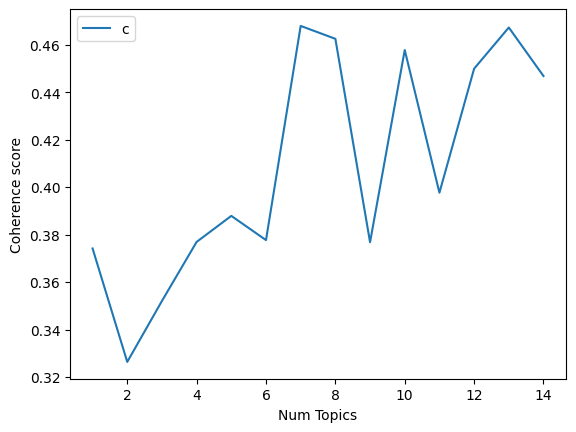

Num Topics = 1  has Coherence Value of 0.3741 model_number : 0
Num Topics = 2  has Coherence Value of 0.3263 model_number : 1
Num Topics = 3  has Coherence Value of 0.352 model_number : 2
Num Topics = 4  has Coherence Value of 0.3769 model_number : 3
Num Topics = 5  has Coherence Value of 0.3879 model_number : 4
Num Topics = 6  has Coherence Value of 0.3777 model_number : 5
Num Topics = 7  has Coherence Value of 0.4679 model_number : 6
Num Topics = 8  has Coherence Value of 0.4625 model_number : 7
Num Topics = 9  has Coherence Value of 0.3768 model_number : 8
Num Topics = 10  has Coherence Value of 0.4577 model_number : 9
Num Topics = 11  has Coherence Value of 0.3976 model_number : 10
Num Topics = 12  has Coherence Value of 0.4499 model_number : 11
Num Topics = 13  has Coherence Value of 0.4672 model_number : 12
Num Topics = 14  has Coherence Value of 0.4468 model_number : 13


In [34]:
# 시작할 최소 토픽 개수
start=1
# 최대 한계
limit=15
# 단계별 증가시킬 토픽 수
step=1

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=text_data, start=start, limit=limit, step=step)

# 토픽의 개수별 Coherence Score 스코어 확인
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
# coherence scores 출력
i=0
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4), "model_number : {}".format(i))
    i+=1

In [36]:
for m in model_list:
    top_topics = m.top_topics(corpus)
    # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
    avg_topic_coherence = sum([t[1] for t in top_topics]) / 15
    print('Average topic coherence: %.4f.' % avg_topic_coherence)
    print(top_topics)
    break

Average topic coherence: -0.0673.
[([(0.005446871, '교육'), (0.0045080865, '기자'), (0.0043773553, '신안'), (0.004137527, '지원'), (0.0038986066, '지역'), (0.003735873, '학교'), (0.0034907768, '이번'), (0.0034771005, '신안군'), (0.0031502508, '문화'), (0.0028654847, '운영'), (0.0028062994, '학생'), (0.002777747, '대상'), (0.002734376, '사업'), (0.002724851, '센터'), (0.002569278, '군수'), (0.0025111975, '사회'), (0.0023880182, '진행'), (0.0023863486, '뉴스'), (0.0021725236, '시간'), (0.0021518334, '참여')], -1.0089875861758275)]


In [41]:
# 토픽의 개수
NUM_TOPICS = 10
# 단어의 개수
TOPICS_W_NUM = 15
# 모델 저장 여부(0: 저장, 1: 미저장)
save_lda_model= 0

RANDOM_STATE = 42
UPDATE_EVERY = 1
CHUNKSIZE = 100
PASSES = 10
ALPHA = 'auto'
PER_WORD_TOPICS = True
SAVE_PATH = 'C:/Users/user/Desktop/jmj_jobs/토픽모델링'
SAVE_NAME = 'news_data'

In [46]:
#모델 정의
lda_model = LdaModel(corpus=corpus, 
                     id2word=id2word,
                     num_topics=NUM_TOPICS,
                     random_state=RANDOM_STATE,
                     update_every=UPDATE_EVERY,
                     chunksize=CHUNKSIZE,
                     passes=PASSES,
                     alpha=ALPHA,
                     per_word_topics=PER_WORD_TOPICS)

# 토픽 출력
print(lda_model.print_topics(num_words=TOPICS_W_NUM))
doc_lda = lda_model[corpus]

# 모델 저장 
if save_lda_model == 0:
    lda_model.save(SAVE_PATH + f'/{SAVE_NAME}_model_lda_topic_modeling.lda')

[(0, '0.029*"신안군" + 0.020*"신안" + 0.010*"개최" + 0.009*"감사" + 0.009*"지역" + 0.009*"뉴스" + 0.009*"학생" + 0.008*"전달" + 0.008*"육성" + 0.008*"선정" + 0.008*"기자" + 0.007*"인재" + 0.007*"사회" + 0.007*"행사" + 0.006*"재단"'), (1, '0.003*"발령" + 0.003*"정지" + 0.003*"수리" + 0.003*"예약" + 0.003*"또래" + 0.003*"오픈" + 0.003*"기술자" + 0.003*"속도" + 0.003*"주인" + 0.003*"위생" + 0.003*"주소" + 0.002*"전자" + 0.002*"마약" + 0.002*"정의" + 0.002*"결혼"'), (2, '0.015*"교육" + 0.011*"지원" + 0.009*"기자" + 0.009*"학교" + 0.008*"운영" + 0.008*"이번" + 0.008*"군수" + 0.007*"지역" + 0.007*"대상" + 0.007*"사업" + 0.006*"진행" + 0.006*"센터" + 0.006*"문화" + 0.006*"참여" + 0.005*"프로그램"'), (3, '0.006*"화재" + 0.006*"제도" + 0.006*"파출소" + 0.006*"정부" + 0.006*"사람" + 0.005*"비전" + 0.005*"확인" + 0.005*"이후" + 0.005*"경제" + 0.005*"이상" + 0.005*"미래" + 0.005*"비율" + 0.005*"시도" + 0.005*"추천" + 0.005*"대표"'), (4, '0.006*"주차" + 0.006*"라이프" + 0.006*"터미널" + 0.005*"미디어" + 0.005*"태양광" + 0.005*"전기" + 0.005*"포토" + 0.005*"폭로" + 0.004*"입력" + 0.004*"게임" + 0.004*"스토리" + 0.004*"글로벌" + 0.004*"시리즈" + 0.004*"마지

In [47]:
list_word = []
for topic_id in range(NUM_TOPICS):
    topic_word_probs = lda_model.show_topic(topic_id, TOPICS_W_NUM)
    for topic_word in topic_word_probs:
        list_word.append(topic_word[0])

In [48]:
list_word_set = list(set(list_word))
series_word = pd.Series(list_word_set, name = 'keywords')

In [53]:
series_word.to_excel(SAVE_PATH + f'/{SAVE_NAME}_review_data_topic_word.xlsx', index=False)

In [56]:
# window에서는 pyLDAvis를 conda로 까는걸 추천

import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [61]:
lda_visualization = gensimvis.prepare(lda_model, corpus, id2word, sort_topics=False, n_jobs=1)
pyLDAvis.save_html(lda_visualization, 'file_name.html')